In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Question 1

Covariance matrix of the transformed data:
[[ 5.30558677e+00 -1.57529895e-16 -7.58038591e-17 -1.00677000e-17
  -2.43993672e-16  3.25719707e-17  1.53976589e-17 -2.36887060e-18
  -6.09984179e-17  1.83587471e-17]
 [-1.57529895e-16  3.87701635e+00  7.65145203e-16 -2.08460613e-16
  -3.19797531e-17  8.40949062e-17 -1.83587471e-17 -8.88326474e-17
   1.30287883e-17  4.02708002e-17]
 [-7.58038591e-17  7.65145203e-16  3.28704664e+00  1.25550142e-16
  -2.03722871e-16  7.57446374e-16  1.77665295e-16 -9.23859533e-17
  -5.80373296e-17  6.63283767e-17]
 [-1.00677000e-17 -2.08460613e-16  1.25550142e-16  2.91254096e+00
  -5.03385002e-16  7.93488370e-16  4.73774120e-17  9.47548239e-18
  -2.40588420e-17  1.85956342e-16]
 [-2.43993672e-16 -3.19797531e-17 -2.03722871e-16 -5.03385002e-16
   2.48633206e+00 -5.19967096e-16  6.00508697e-16 -9.68275857e-16
  -5.48985761e-16  7.81727297e-16]
 [ 3.25719707e-17  8.40949062e-17  7.57446374e-16  7.93488370e-16
  -5.19967096e-16  2.35358942e+00  6.96447956e-16 -2.884

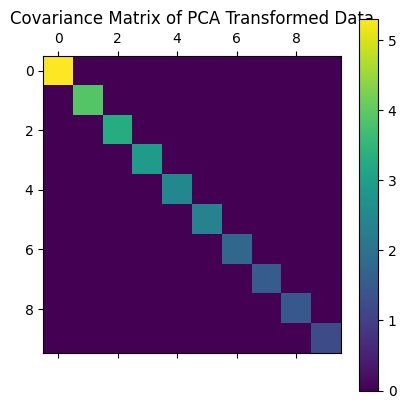

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Replace with the correct path to your dataset
file_path = '/content/drive/MyDrive/ISML_files/mnist-1.csv'

# Load the dataset
dataset = pd.read_csv(file_path, header=None)

# Extract labels and features
labels = dataset.iloc[:, 0]
features = dataset.iloc[:, 1:]

# Perform PCA to reduce the features to 10 dimensions
pca = PCA(n_components=10)
transformed_data = pca.fit_transform(features)

# Compute the covariance matrix of the transformed data
covariance_matrix = np.cov(transformed_data, rowvar=False)

# Display the covariance matrix
print("Covariance matrix of the transformed data:")
print(covariance_matrix)

# Optional: Plot the covariance matrix for visualization
plt.matshow(covariance_matrix)
plt.title("Covariance Matrix of PCA Transformed Data")
plt.colorbar()
plt.show()

# Question 2

Cluster centers:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels assigned to each sample:
[5 6 2 ... 5 9 8]


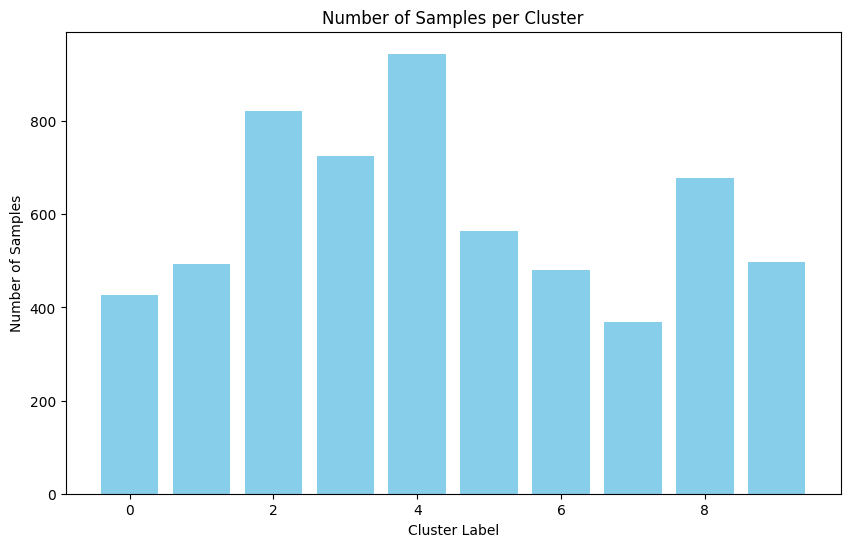

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Perform k-means clustering to cluster the dataset (without applying PCA) into 10 groups
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(features)

# Display the cluster centers and labels
print("Cluster centers:")
print(kmeans.cluster_centers_)
print("Cluster labels:")
print(kmeans.labels_)

# Question 3

Cluster centers:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Cluster labels:
[5 6 2 ... 5 9 8]


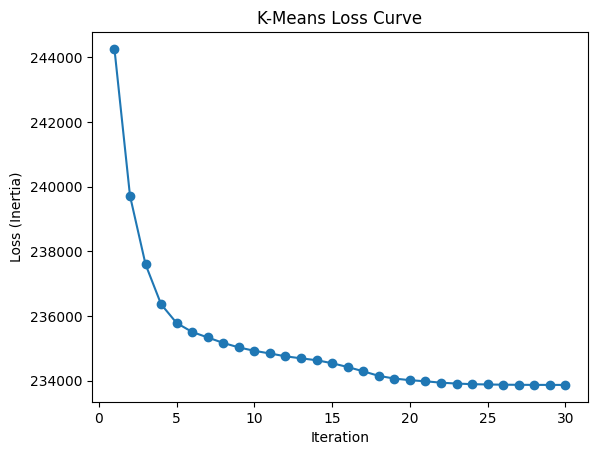

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform k-means clustering to cluster the dataset (without applying PCA) into 10 groups
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(features)

# Display the cluster centers and labels
print("Cluster centers:")
print(kmeans.cluster_centers_)
print("Cluster labels:")
print(kmeans.labels_)

# Plot the loss curve (inertia) with respect to the number of iterations
inertia_values = []
max_iter = 30
for i in range(1, max_iter + 1):
    kmeans_iter = KMeans(n_clusters=10, max_iter=i, n_init=1, random_state=42)
    kmeans_iter.fit(features)
    inertia_values.append(kmeans_iter.inertia_)

plt.plot(range(1, max_iter + 1), inertia_values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss (Inertia)')
plt.title('K-Means Loss Curve')
plt.show()

# Question 4

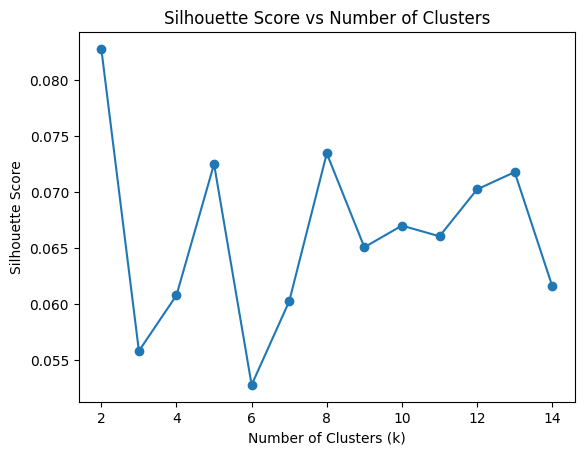

Best k based on silhouette score: 2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Replace with the correct path to your dataset
file_path = '/content/drive/MyDrive/ISML_files/mnist-1.csv'

# Load the dataset
dataset = pd.read_csv(file_path)

# Separate features and labels
labels = dataset.iloc[:, 0]
features = dataset.iloc[:, 1:]

# Split the data into training and validation sets
train_features = features.iloc[:4000, :]
validation_features = features.iloc[4000:, :]

# Determine the best k for k-means using the silhouette score on validation set
silhouette_scores = []
possible_k_values = range(2, 15)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_features)
    cluster_labels = kmeans.predict(validation_features)
    silhouette_avg = silhouette_score(validation_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different values of k
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Display the best k
best_k = possible_k_values[np.argmax(silhouette_scores)]
print(f"Best k based on silhouette score: {best_k}")

# Question 5

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
# Assuming the dataset is saved as 'mnist_subsample.csv'
# Replace with the correct path to your dataset
file_path = '/content/drive/MyDrive/ISML_files/mnist-1.csv'

# Load the dataset
dataset = pd.read_csv(file_path)

# Extract labels and features
labels = dataset.iloc[:, 0]
features = dataset.iloc[:, 1:]

# Use the first 500 samples for kernel k-means
features_subset = features.iloc[:500, :]

# Compute the hyperparameter 2 * sigma^2
N = len(features_subset)
pairwise_distances = np.sum((features_subset.values[:, np.newaxis, :] - features_subset.values[np.newaxis, :, :]) ** 2, axis=2)
sigma_squared = np.sum(pairwise_distances) / (N ** 2)

# Compute the RBF kernel matrix
rbf_kernel = np.exp(-pairwise_distances / (2 * sigma_squared))

# Kernel k-means algorithm parameters
num_clusters = 5
max_iter = 100
np.random.seed(42)

# Initialize cluster assignments randomly
cluster_assignments = np.random.randint(0, num_clusters, N)

# Kernel k-means algorithm
for iteration in range(max_iter):
    # Compute the cluster-wise membership matrix
    membership_matrix = np.zeros((N, num_clusters))
    membership_matrix[np.arange(N), cluster_assignments] = 1

    # Compute the cluster-wise kernel sums
    cluster_sums = membership_matrix.T @ rbf_kernel @ membership_matrix
    cluster_sizes = np.sum(membership_matrix, axis=0)
    cluster_sizes[cluster_sizes == 0] = 1  # To avoid division by zero

    # Compute distances to cluster centroids in the kernel space
    distances = np.zeros((N, num_clusters))
    for k in range(num_clusters):
        cluster_membership = membership_matrix[:, k]
        distances[:, k] = np.diag(rbf_kernel) - 2 * (rbf_kernel @ cluster_membership) / cluster_sizes[k] + cluster_sums[k, k] / (cluster_sizes[k] ** 2)

    # Update cluster assignments
    new_assignments = np.argmin(distances, axis=1)

    # Check for convergence
    if np.all(new_assignments == cluster_assignments):
        break

    cluster_assignments = new_assignments

# Display final cluster assignments
print("Final cluster assignments:")
print(cluster_assignments)

Final cluster assignments:
[0 4 1 3 4 1 2 1 3 2 1 2 4 1 3 4 3 4 3 4 0 3 1 4 2 3 2 0 1 4 2 4 3 2 1 4 0
 4 4 1 2 3 3 4 3 4 3 4 2 2 0 4 1 3 3 0 3 4 1 0 1 4 0 4 1 4 1 0 0 1 3 1 4 2
 0 1 1 1 3 2 0 0 4 3 2 4 3 0 3 4 3 4 4 3 0 3 2 2 1 4 3 1 3 1 1 4 2 0 4 4 2
 1 1 0 3 4 0 0 0 0 0 1 3 1 2 4 3 1 4 2 3 1 3 4 2 2 1 2 3 3 3 3 4 1 1 2 4 3
 2 4 4 1 3 4 4 0 2 4 0 4 2 4 3 4 4 3 3 1 0 4 0 3 1 1 1 4 1 0 2 1 2 2 3 1 3
 4 0 4 4 4 1 0 3 4 3 4 2 2 4 1 1 2 2 4 1 0 3 1 0 0 1 4 0 4 2 4 3 4 2 0 4 0
 3 3 2 4 3 4 0 3 1 4 0 0 2 2 3 4 2 1 4 2 3 2 2 0 3 1 0 4 1 1 0 2 2 1 3 3 3
 4 4 4 3 4 2 2 3 4 1 1 3 3 2 4 3 1 0 4 2 3 2 4 0 2 3 4 1 3 3 1 2 4 0 0 2 0
 3 2 4 1 3 4 0 4 3 0 3 0 1 1 4 4 3 4 1 4 0 1 3 0 2 4 4 3 0 0 2 2 3 2 4 2 2
 4 4 3 3 3 0 4 2 4 2 4 1 2 0 2 3 4 1 2 3 4 1 2 1 1 0 1 2 3 3 3 0 1 4 1 3 1
 3 3 3 4 0 4 3 0 3 4 0 1 3 4 0 2 3 4 3 2 0 2 2 1 4 2 1 1 0 4 4 3 4 2 2 1 4
 1 3 1 3 3 3 4 3 1 1 1 3 3 4 3 3 4 2 4 0 4 0 4 4 4 2 4 0 4 4 4 2 0 3 3 1 1
 2 4 1 0 4 1 0 0 0 1 1 1 0 0 4 4 3 0 1 0 4 1 3 4 3 1 3 1 0 4 1 4 0 3 2 2 